# Plot Animation

This script allows you to create a beatiful plot showing the trace of the datapoints by animation. 
At the end, this allows you to save the plot animation as a Gif file. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib notebook 

## Plots (Line Plots, Scatter Plots)

In [2]:
# Read csv file
file_name = 'covid_data.csv' 
file_path = 'Data/'

# Specify the columns for x and y axis
x_title = 'Date'
y_title = 'Daily Cases'

# Adjust speed for Gif animation (faster: speed < 25, slower: speed > 25)
speed = 25

# Change the point setting
point = '.' # circle shape point 
color = 'b' #blue
plot_setting = color+point

**Dot Styles**
```
character        description
=============    ===============================
``'.'``          point marker
``','``          pixel marker
``'o'``          circle marker
``'v'``          triangle_down marker
``'^'``          triangle_up marker
``'<'``          triangle_left marker
``'>'``          triangle_right marker
``'1'``          tri_down marker
``'2'``          tri_up marker
``'3'``          tri_left marker
``'4'``          tri_right marker
``'s'``          square marker
``'p'``          pentagon marker
``'*'``          star marker
``'h'``          hexagon1 marker
``'H'``          hexagon2 marker
``'+'``          plus marker
``'x'``          x marker
``'D'``          diamond marker
``'d'``          thin_diamond marker
``'|'``          vline marker
``'_'``          hline marker
=============    ===============================
```

**Line Styles**
```
=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    ===============================
```
**color**
```
=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================
```

In [3]:
df = pd.read_csv(file_path+file_name, parse_dates=[x_title])
df

,Date,Daily Cases
0,2020-01-21,1
1,2020-01-24,1
2,2020-01-25,1
3,2020-01-26,2
4,2020-01-30,1
...,...,...
340,2021-01-22,175347
341,2021-01-23,159728
342,2021-01-24,130885
343,2021-01-25,130142


<IPython.core.display.Javascript object>


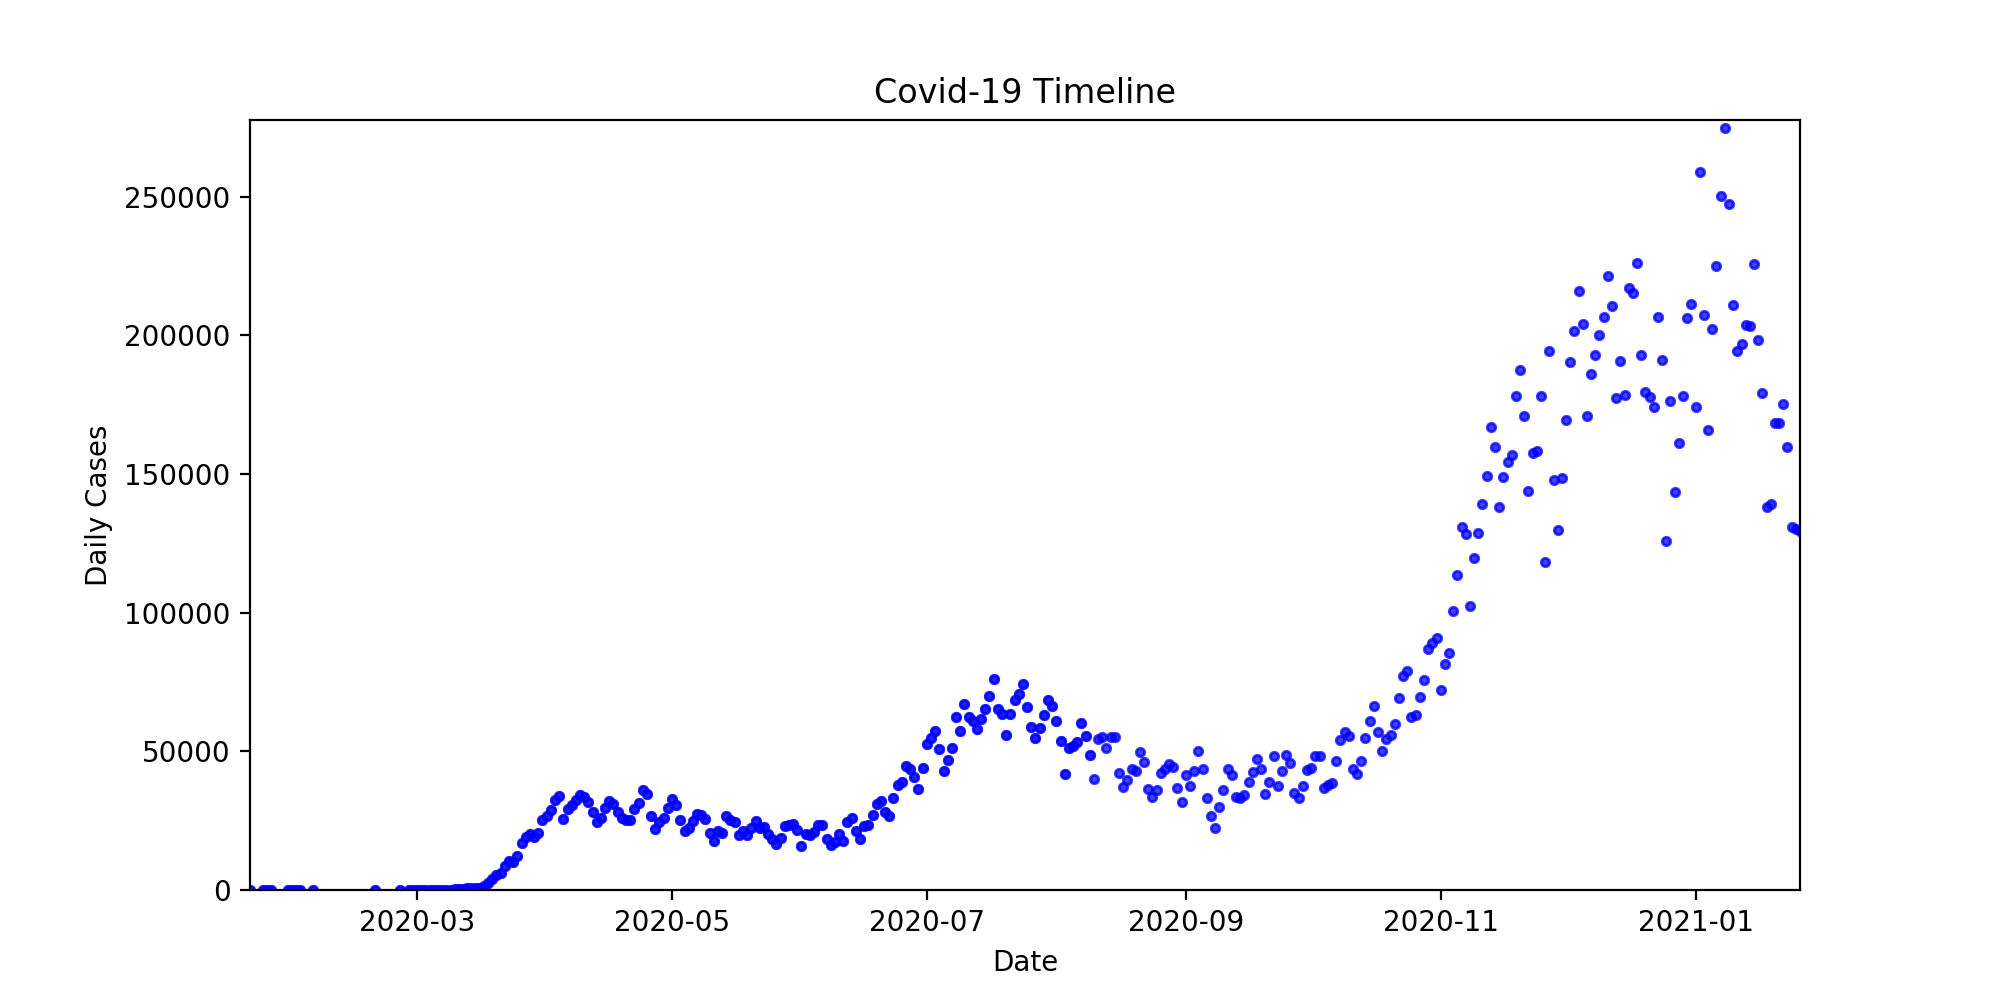

In [4]:
fig, ax = plt.subplots(figsize=(10,5))  
x, y = [], [] 
plot1, = plt.plot([], [], 'b.', alpha=0.5) 
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title('Covid-19 Timeline')

def init():  
    ax.set_xlim(df[x_title].min(), df[x_title].max())  
    ax.set_ylim(0, df[y_title].max()+df[y_title].max()/90)
  
def update(i):  
    x.append(df[x_title][i])  
    y.append(df[y_title][i])  
    plot1.set_data(x, y)  

ani = FuncAnimation(fig, update, df.index.values, init_func=init)  
plt.show()

In [5]:
writer = PillowWriter(fps=25)  
ani.save(file_path+'covid-19.gif', writer=writer) 

/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
